Objective: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

Data: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

Id: Unique identification number for the property.
date: date the house was sold.
price: price of the house.
waterfront: house which has a view to a waterfront.
condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
Sqft_above: square footage of house apart from basement.
Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
Sqft_lot15: lotSize area in 2015(implies - some renovations).
Exploring the data
We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a regression task, you can use linear regression for building a model. You are also encouraged to use other models in your project if necessary. To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using matplotlib and seaborn for developing visualizations. The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables). You can also use tableau to visually explore the data further.

Model
Build a regression model that best fits your data. You can use the measures of accuracies that have been discussed in class.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def nan_values_of_all_columns(this_df, return_dict:[bool] = False):
    """prints (defaults) or returns dictionary of all columns in this_df and their respective nan-values"""
    if not return_dict:
        for col in this_df.columns:
            print(col, this_df[col].isna().sum())
        return
    return {col:this_df[col].isna().sum() for col in this_df.columns}

In [21]:
def split_column_names_by(this_df, include_dtypes:[list]=["int","float"]):
    # __author__ = "Roman Kaltschew"
    """takes in this_df, splits this_df's columns into two lists of column name by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_lst, excl_lst)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (incl_lst, excl_lst)

In [38]:
def extract_year_month(this_date:[str]=None):
    # __author__ = "Roman Kaltschew"
    """takes this_date in format MM/DD/YYYY and returns YYYY_MM"""
    if this_date:
        return this_date.split("/")[2]+"_"+this_date.split("/")[0]
    return None

In [ ]:
def long_lat_map():
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    gdf = GeoDataFrame(df, geometry=geometry)   

    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [39]:
extract_year_month("01/24/1981")

'1981_01'

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [2]:
data = pd.read_csv("data/regression_data.csv")

In [7]:
len(data)

21597

In [8]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

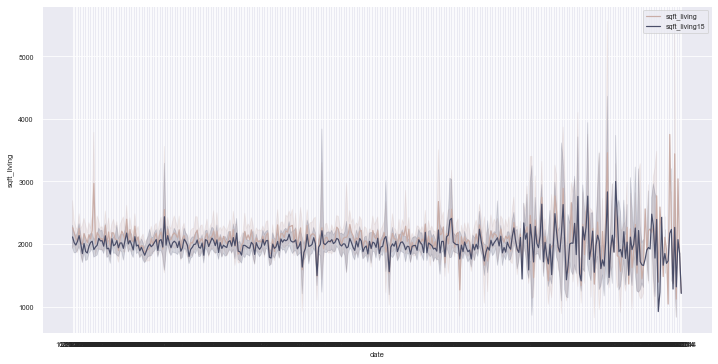

In [14]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=0.8)  # font scale lowered to avoid overlapping x-ticks
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=data, x="date", y="sqft_living", label="sqft_living", color="#c9ada7")
sns.lineplot(data=data, x="date", y="sqft_living15", label="sqft_living15", color="#4a4e69")
plt.legend()
plt.show()

In [20]:
data["view"].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [16]:
data["zipcode"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [25]:
split_column_names_by(data)[0]

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [42]:
# change respective columns to categorical
for col in ["view", "condition", "grade", "lat", "long", "zipcode", "waterfront"]:
    data[col] = data[col].astype('category')

In [43]:
split_column_names_by(data)

(['id',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'sqft_living15',
  'sqft_lot15',
  'price'],
 ['date',
  'waterfront',
  'view',
  'condition',
  'grade',
  'zipcode',
  'lat',
  'long',
  'date_sold'])

In [35]:
def extract_year_month(this_date:[str]=None):
    if this_date:
        print(this_date.split("/")[2]+"_"+this_date.split("/")[0])
    return None

In [36]:
extract_year_month("10/13/2014")

2014_10


In [40]:
data["date_sold"] = list(map(extract_year_month, data["date"]))

In [45]:
data["waterfront"].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64